In [2]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.5 MB 19.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 12.4 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
warnings.filterwarnings('ignore')

In [9]:
df_enrich = pd.read_csv('../data/enriched_nba_player_data.csv')
df_raw = pd.read_csv('../data/historic_nba_player_data.csv')
df_raw

,Season,Player,MP,PTS,AST,TRB,STL,BLK,TS%,PER,WS,BPM,VORP,USG%,W/L%,Share
0,2003,Tracy McGrady,39.4,32.1,5.5,6.5,1.7,0.8,0.564,30.3,16.1,10.5,9.3,35.2,0.512,0.359
1,2003,Kobe Bryant,41.5,30.0,5.9,6.9,2.2,0.8,0.550,26.2,14.9,7.1,7.7,32.9,0.610,0.417
2,2003,Allen Iverson,42.5,27.6,5.5,4.2,2.7,0.2,0.500,21.2,9.2,3.5,4.8,32.9,0.585,0.070
3,2003,Shaquille O'Neal,37.8,27.5,3.1,11.1,0.6,2.4,0.602,29.5,13.2,6.5,5.5,30.2,0.610,0.106
4,2003,Paul Pierce,39.2,25.9,4.4,7.3,1.8,0.8,0.532,22.7,10.1,4.9,5.4,33.2,0.537,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11338,2025,Riley Minix,7.0,0.0,0.0,2.0,0.0,0.0,0.000,-1.7,0.0,-11.8,0.0,6.1,0.415,0.000
11339,2025,Jahlil Okafor,3.0,0.0,1.0,1.0,0.0,0.0,0.000,13.8,0.0,7.5,0.0,0.0,0.610,0.000
11340,2025,Zyon Pullin,1.0,0.0,0.0,0.0,0.0,0.0,0.000,-11.7,0.0,-22.7,0.0,13.4,0.585,0.000
11341,2025,Isaiah Stevens,2.0,0.0,0.0,0.7,0.3,0.0,0.000,0.1,0.0,-11.8,0.0,14.8,0.451,0.000


In [10]:
train = df_enrich[df_enrich['Season'] < 2025].copy()
test = df_enrich[df_enrich['Season'] == 2025].copy()

In [11]:
X = train[['MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TS%', 'PER', 'WS', 'BPM', 'VORP', 'USG%', 'W/L%', 'VORP_W/L']]

y = train['Share']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
param_grid = {
    "num_leaves": [15, 31, 63],
    "max_depth": [-1, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [300, 500, 800],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}

search = RandomizedSearchCV(
    lgb.LGBMRegressor(objective="regression", random_state=42),
    param_grid,
    n_iter=25,
    scoring="neg_mean_absolute_error",
    cv=3,
    n_jobs=-1
)

search.fit(X_train, y_train)
best_lgb = search.best_estimator_

  File "C:\Users\alecw\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "C:\Users\alecw\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\alecw\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\alecw\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                     

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3433
[LightGBM] [Info] Number of data points in the train set: 7047, number of used features: 14
[LightGBM] [Info] Start training from score 0.006827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [14]:
best_lgb.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3433
[LightGBM] [Info] Number of data points in the train set: 7047, number of used features: 14
[LightGBM] [Info] Start training from score 0.006827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

,boosting_type,'gbdt'
,num_leaves,63
,max_depth,5
,learning_rate,0.01
,n_estimators,500
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [17]:
yhat = np.clip(best_lgb.predict(X_test), a_min=0, a_max=None)
base = np.zeros(len(yhat))

mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
baseline = mean_absolute_error(y_test, base)

print('Mean Absolute Error:', mae)
print('Baseline', baseline)
print('r2 score:', r2)

Mean Absolute Error: 0.0032958555583511772
Baseline 0.0051538024971623155
r2 score: 0.7836272056804625


In [19]:
df_val = train.copy()
df_val.loc[X_test.index, 'yhat'] = yhat

In [35]:
df_val = df_val.dropna().sort_values(by=['yhat', 'Share'], ascending=False)
df_val[['Season', 'Player', 'Share', 'yhat']].head(15)

,Season,Player,Share,yhat
2191,2009,LeBron James,0.969,0.915404
3710,2013,LeBron James,0.998,0.852932
7442,2022,Giannis Antetokounmpo,0.595,0.837296
6568,2020,James Harden,0.363,0.775706
5294,2017,Russell Westbrook,0.879,0.746763
3301,2012,Kevin Durant,0.735,0.734078
0,2003,Tracy McGrady,0.359,0.489249
8367,2024,Shai Gilgeous-Alexander,0.646,0.466388
2199,2009,Chris Paul,0.159,0.410807
7923,2023,Jayson Tatum,0.280,0.407046


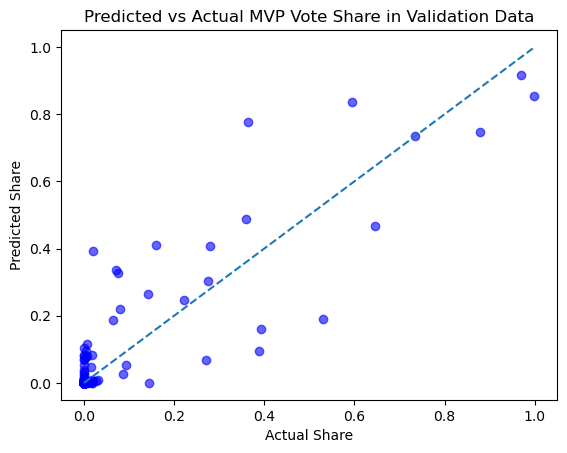

In [22]:
plt.scatter(y_test, yhat, alpha=0.6, color='b')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Actual Share")
plt.ylabel("Predicted Share")
plt.title("Predicted vs Actual MVP Vote Share in Validation Data")
plt.show()

In [30]:
X_2025 = test[['MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TS%', 'PER', 'WS', 'BPM', 'VORP', 'USG%', 'W/L%', 'VORP_W/L']]

pred_2025 = test.copy()
pred_2025['yhat'] = np.clip(best_lgb.predict(X_2025), a_min=0, a_max=None)
pred_2025[['Player', 'Share', 'yhat']].sort_values(by=['yhat'], ascending=False).head(25)

,Player,Share,yhat
8809,Shai Gilgeous-Alexander,0.913,0.937268
8811,Nikola Jokić,0.787,0.755760
8810,Giannis Antetokounmpo,0.470,0.399207
8814,Jayson Tatum,0.311,0.229474
8871,Evan Mobley,0.001,0.095326
8926,Jarrett Allen,0.000,0.081170
8831,Trae Young,0.000,0.079985
8826,Stephen Curry,0.002,0.063665
8813,Anthony Edwards,0.012,0.057996
8825,Zion Williamson,0.000,0.056581


In [37]:
base = np.zeros(len(pred_2025))

mae_test = mean_absolute_error(pred_2025['yhat'], pred_2025['Share'])
baseline = mean_absolute_error(base, pred_2025['Share'])

print("Test MAE:", mae_test)
print("Baseline MAE:", baseline)
print("R2 score:", r2_score(pred_2025['Share'], pred_2025['yhat']))

Test MAE: 0.001997787064178262
Baseline MAE: 0.005652173913043478
R2 score: 0.9688370521967371


In [33]:
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_lgb.feature_importances_})
importances.sort_values(by='importance', ascending=False)

,feature,importance
13,VORP_W/L,869
2,AST,524
1,PTS,460
7,PER,452
12,W/L%,360
11,USG%,341
9,BPM,255
10,VORP,213
0,MP,166
8,WS,165


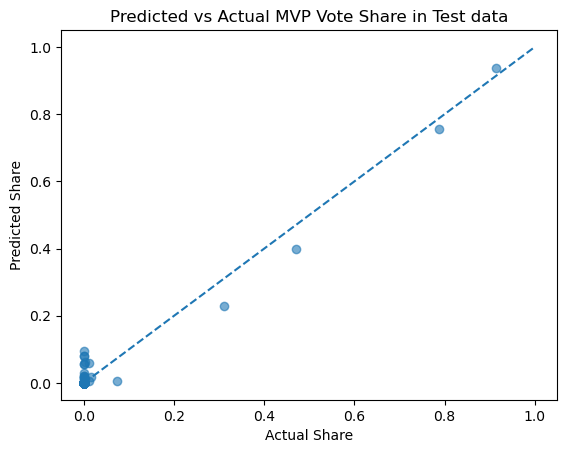

In [34]:
plt.scatter(pred_2025['Share'], pred_2025['yhat'], alpha=0.6)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Actual Share")
plt.ylabel("Predicted Share")
plt.title("Predicted vs Actual MVP Vote Share in Test data")
plt.show()

Notes:
1. LightGBM performs very well on test data, MAE of 0.002 and r2 of 0.97
2. Outperforms both Random Forest and XGBoost
3. XGBoost appears to perform better on low vote share players, this can be corrected with a hybrid method including a binary classifier on whether players get votes